<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 1</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm BFS i DFS</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [32]:
from collections import deque
import random
from IPython.display import display, Markdown
import matplotlib.pyplot as plt


Kolejne litery alfabetu będą reprezentowały losowe wierzchołki o współrzędnych ze zbioru [-100,100] x [0,50] x [-100,100]


In [33]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [34]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [35]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [0, 50], zRange = [-100,100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        z = random.randint(zRange[0], zRange[1])
        points[alphabet[i]] = [x,y,z]
    return points


Losujemy n wierzchołków

In [36]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(10) # n = 11
graph, points = all

In [37]:
for point, coords in points.items():
   x, y, z = coords
   print(f"{point}: ({x}, {y}, {z})")

A: (77, 8, -77)
B: (15, 27, -53)
C: (17, 43, 25)
D: (-30, 28, -50)
E: (80, 40, 64)
F: (48, 13, -84)
G: (-14, 3, 21)
H: (94, 36, -49)
I: (-16, 21, -90)
J: (-41, 3, 92)


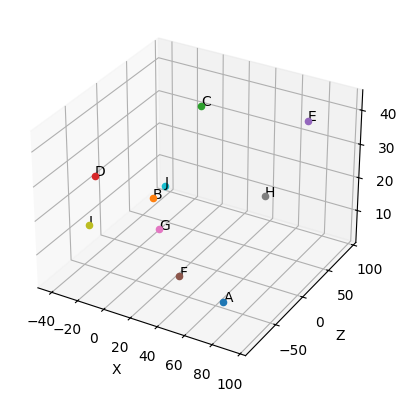

In [38]:
def plot3D(points):
    labels = points.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)


    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()

plot3D(points)



In [39]:
display(Markdown(r"Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem"))
display(Markdown(r"$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$"))


Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem

$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$

Funkcja obliczająca odległość Euklidesową między podanymi punktami

In [40]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2+(P[2]-Q[2])**2)**(1/2)

#przykład
print(distance(points["A"],points["C"]))

123.40583454602137


Funkcja obliczająca odległość Euklidesową, ale karząca gdy jedziemy pod górę (yA < yB), oraz nagradzająca gdy jedziemy z górki (yA > yB).

Dobierając parametr kary należy pamiętać żeby był wartością nieujemną, a dobierając parametr nagrody aby był z przedziału [0,1)

In [41]:
def penalty_distance(P, Q, penalty, prize):
    d = distance(P,Q)
    if P[1] < Q[1]:
        return (1+penalty)*d
    if P[1] > Q[1]:
        return(1-prize)*d
    return d

Odległości między wierzchołkami możemy przechowywać w słowniku krawędzi

In [42]:
def distances(points, withPenalty = False):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                if withPenalty:
                    distance_dict[(node1,node2)] = penalty_distance(points[node1],points[node2], 0.4, 0.1) #kara 40%, nagroda 10%
                else:
                    distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)
penalty_distances_dict = distances(points, True)
penalty_distances_dict

{('A', 'B'): 96.80268591315016,
 ('A', 'C'): 172.7681683644299,
 ('A', 'D'): 157.0123562016697,
 ('A', 'E'): 202.4634287964125,
 ('A', 'F'): 42.34855369431168,
 ('A', 'G'): 120.44542332525549,
 ('A', 'H'): 60.330091993962675,
 ('A', 'I'): 132.71970464102154,
 ('A', 'J'): 185.5615800751869,
 ('B', 'A'): 62.230298087025105,
 ('B', 'C'): 111.5089234097433,
 ('B', 'D'): 63.155363984383776,
 ('B', 'E'): 188.2622638767525,
 ('B', 'F'): 42.65278419986203,
 ('B', 'G'): 74.72168359987614,
 ('B', 'H'): 111.45617972997279,
 ('B', 'I'): 43.77739142525511,
 ('B', 'J'): 141.5520045778229,
 ('C', 'A'): 111.06525109141923,
 ('C', 'B'): 71.68430790626356,
 ('C', 'D'): 80.79473992779481,
 ('C', 'E'): 66.73971830926469,
 ('C', 'F'): 105.50364922598649,
 ('C', 'G'): 45.6877445273894,
 ('C', 'H'): 96.32102574204659,
 ('C', 'I'): 109.48232734099143,
 ('C', 'J'): 87.50388562801083,
 ('D', 'A'): 100.93651470107338,
 ('D', 'B'): 40.59987684710386,
 ('D', 'C'): 125.68070655434748,
 ('D', 'E'): 222.4194236122375

Funkcja sumująca odległość na całej ścieżce.

In [43]:
def get_path_length(path, withPenalty = False):
    dist_dict = {}
    if withPenalty :
        dist_dict = penalty_distances_dict
    else:
        dist_dict = distances_dict
    
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

#przykład
samplePath = ["A", "D", "C", "B"]
print(samplePath, " ---> ", get_path_length(samplePath))
print(samplePath, " -- pen --> ", get_path_length(samplePath, True))


['A', 'D', 'C', 'B']  --->  281.5728472612575
['A', 'D', 'C', 'B']  -- pen -->  354.3773706622807


Funkcja zwracająca najkrótszą ścieżkę z możliwych

In [44]:
def get_shortest_path(paths, starter_node):
    minPathLength = get_path_length(paths[0])
    shortestPath = paths[0]
    for path in paths:
      path.append(starter_node)
      if get_path_length(path) < minPathLength:
          minPathLength = get_path_length(path)
          shortestPath = path
    return (shortestPath, round(minPathLength,3))

In [45]:
def edges(dist_dict):
    graph = {}
    for edge in dist_dict:
        node1, node2 = edge
        if node1 not in graph:
            graph[node1] = [node2]
        else:
            graph[node1].append(node2)
    return graph

graph = edges(distances_dict)
graph

{'A': ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'B': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J'],
 'F': ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J'],
 'G': ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J'],
 'I': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']}

1. Przeszukiwanie wszystkich połączeń. Wagą krawędzi między wierzchołkami jest odległość Euklidesowa

a) Przeszukiwanie wszerz

In [46]:
def BFS(graph, starter_node):
    all_paths = []  
    queue = deque([(starter_node, [starter_node])]) 
    

    while queue:
        node, path = queue.popleft() 
        neighbors = graph.get(node, [])  

        for neighbor in neighbors:
            if neighbor not in path:  
                new_path = path + [neighbor]  
                if len(new_path) == len(graph): 
                    all_paths.append(new_path)
                else:
                    queue.append((neighbor, new_path)) 
    return all_paths
    

In [47]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths, 'A')
print(shortest_path)

(['A', 'H', 'F', 'B', 'I', 'D', 'G', 'J', 'C', 'E', 'A'], 568.586)


b) przeszukiwanie w głąb

In [48]:
def DFS(graph, starterNode, path=[]):
    path = path + [starterNode]
    if len(path) == len(graph): 
        return [path]
    paths = []
    for neighbour in graph[starterNode]:
        if neighbour not in path:
            newpaths = DFS(graph, neighbour, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [49]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths, 'A')
print(shortest_path)

(['A', 'H', 'F', 'B', 'I', 'D', 'G', 'J', 'C', 'E', 'A'], 568.586)


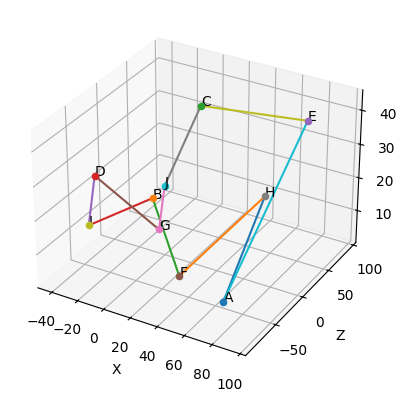

In [50]:
def plot3D_path(path, pointsp):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for i in range(len(path) - 1):
        point1 = path[i]
        point2 = path[i + 1]
        ax.plot([points[point1][0], points[point2][0]],
                [points[point1][2], points[point2][2]],
                [points[point1][1], points[point2][1]])
    plt.show()

plot3D_path(shortest_path[0], points)


2. Przeszukiwanie wszystkich połączeń. Wagą krawędzi jest odległość Euklidesowa, ale z karą 40% gdy przechodząc z punktu A=(xA, yA, zA) do B=(xB, yB, zB) idziemy ,,pod górkę" (yA < yB) oraz nagrodą 10% gdy schodzimy (yA > yB) 

a) Przeszukiwanie wszerz

In [51]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths, 'A', True)
print(shortest_path)

(['A', 'H', 'F', 'B', 'I', 'D', 'G', 'C', 'E', 'J', 'A'], 610.281)


b) Przeszukiwanie w głąb

In [52]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A', True)
print(shortest_path)

(['A', 'H', 'F', 'B', 'I', 'D', 'G', 'C', 'E', 'J', 'A'], 610.281)


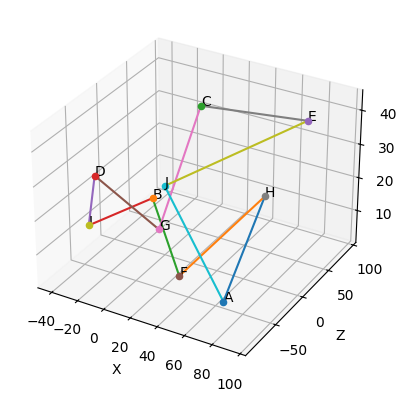

In [53]:
plot3D_path(shortest_path[0], points)


Wyrzucamy losowo p% krawędzi z grafu.

In [54]:
def return_random_edges(dict, p, starter_node):
    dict = {edge: distance for edge, distance in dict.items() if edge[1] != starter_node}
    num_of_edges = int(len(dict)*p)
    edges = random.sample(list(dict.keys()), num_of_edges)
    return edges



In [55]:
def remove_edges(dict, edges_to_remove):
    for edge in edges_to_remove:
        del dict[edge]
    return dict

In [56]:
random_edges = return_random_edges(distances_dict, 0.1, 'A')
print("Usunięte zostaną krawędzie:", ", ".join([str(edge) for edge in random_edges]))
distances_dict = remove_edges(distances_dict, random_edges)
penalty_distances_dict = remove_edges(penalty_distances_dict, random_edges)
graph = edges(distances_dict)
graph

Usunięte zostaną krawędzie: ('A', 'J'), ('A', 'G'), ('G', 'E'), ('F', 'I'), ('C', 'I'), ('F', 'E'), ('B', 'G'), ('I', 'D')


{'A': ['B', 'C', 'D', 'E', 'F', 'H', 'I'],
 'B': ['A', 'C', 'D', 'E', 'F', 'H', 'I', 'J'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'J'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J'],
 'F': ['A', 'B', 'C', 'D', 'G', 'H', 'J'],
 'G': ['A', 'B', 'C', 'D', 'F', 'H', 'I', 'J'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J'],
 'I': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'J'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']}

a) Przeszukiwanie wszerz

In [57]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A')
print(shortest_path)

(['A', 'F', 'B', 'D', 'I', 'H', 'E', 'C', 'G', 'J', 'A'], 598.866)


b) Przeszukanie w głąb

In [58]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A')
print(shortest_path)

(['A', 'F', 'B', 'D', 'I', 'H', 'E', 'C', 'G', 'J', 'A'], 598.866)


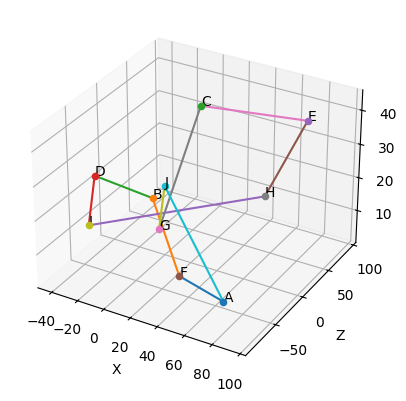

In [59]:
plot3D_path(shortest_path[0], points)

Ponownie przeszukujemy graf, ale z wyrzuconymi krawędziami i karą za drogę w górę i nagrodą za drogę w dół

In [60]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A', True)
print(shortest_path)

(['A', 'H', 'F', 'B', 'D', 'I', 'G', 'C', 'E', 'J', 'A'], 640.144)


In [61]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A', True)
print(shortest_path)

(['A', 'H', 'F', 'B', 'D', 'I', 'G', 'C', 'E', 'J', 'A'], 640.144)


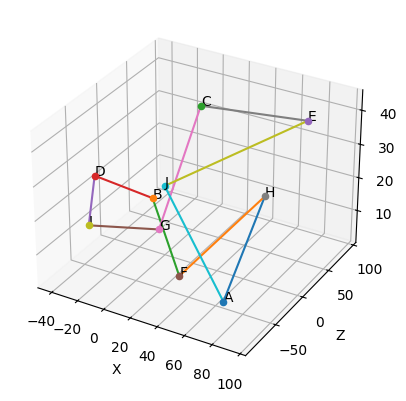

In [62]:
plot3D_path(shortest_path[0], points)